In [ ]:
#Classify hand-written number (Hand Written Digit Recognition) using Support Vector Machines

The file ZipData 2019.csv contains the data table. This figure shows what it contains. Each image is an array of 16 by 16 pixels:

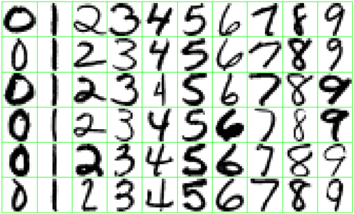

These digitalized images were obtained by scanning hand-written zip code numbers from enveloped processed by the US Postal Service. These are gray-scale images with a 16 x 16 resolution. Each pixel’s intensity goes from -1 to 1 (White to black). Images have been processed so they have approximately the same size and orientation.

This is naturally a classification problem and it is very important to keep the error rate very low to avoid mail misdirection. Column one contains the variable to classify coded in the following manner: 0=‘cero’; 1=‘uno’; 2=‘dos’; 3=‘tres’; 4=‘cuatro’; 5=‘cinco’;6=‘seis’; 7=‘siete’; 8=‘ocho’ y 9=‘nueve’ (0=‘zero’; 1=‘one’; 2=‘two; 3=‘three’; 4=‘four’; 5=‘five’;6=‘six’; 7=‘seven’; 8=‘eight’ y 9=‘nine’). The other columns are the predictive attributes. Each row of attributes represents a 16x16 image, thus each row has 256 predictive variables.

In [11]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import pandas.util.testing as tm

In [16]:
ZipData = 'C:\\test\\ZipData_2020.csv'
# Read the URL to load datasets
zipData = pd.read_csv(ZipData, sep= ';')

In [17]:
zipData.head(10)

,Numero,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
0,seis,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,cinco,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,cuatro,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,siete,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,tres,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
5,seis,-1.0,-1.0,-1.0,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0
6,tres,-1.0,-1.0,-1.0,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7,uno,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
8,cero,-1.0,-1.0,-1.0,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0
9,uno,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [18]:
# Finding correlated Variables
zipData.corr()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
V2,1.000000,0.694861,0.364509,0.178517,0.090240,0.046209,0.013281,-0.017910,-0.021123,-0.000663,...,0.036350,-0.015108,-0.054068,-0.032793,-0.019799,-0.014181,-0.010179,-0.006497,-0.002521,-0.003085
V3,0.694861,1.000000,0.724624,0.389306,0.210339,0.111999,0.038795,-0.032701,-0.044845,-0.015250,...,0.051369,-0.028778,-0.093803,-0.057843,-0.031885,-0.018012,-0.007500,0.008642,0.014807,0.000859
V4,0.364509,0.724624,1.000000,0.726472,0.425668,0.245102,0.109003,-0.015103,-0.043409,-0.012485,...,0.089798,-0.015749,-0.109844,-0.070601,-0.033251,-0.013323,-0.000079,0.016185,0.023888,0.010526
V5,0.178517,0.389306,0.726472,1.000000,0.756962,0.453857,0.232747,0.028335,-0.034824,-0.003986,...,0.166993,0.022042,-0.115874,-0.078008,-0.035071,-0.012682,0.002968,0.018170,0.029797,0.019898
V6,0.090240,0.210339,0.425668,0.756962,1.000000,0.772634,0.431053,0.113824,-0.002046,0.004051,...,0.245661,0.066243,-0.106688,-0.068793,-0.026443,-0.006080,0.020436,0.044317,0.056048,0.037737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V253,-0.014181,-0.018012,-0.013323,-0.012682,-0.006080,-0.002314,-0.005377,-0.037519,0.020639,0.119054,...,0.024617,-0.011402,0.103637,0.412541,0.764909,1.000000,0.719252,0.335360,0.113203,0.004004
V254,-0.010179,-0.007500,-0.000079,0.002968,0.020436,0.039201,0.047005,0.020097,0.039050,0.071259,...,-0.049664,-0.121194,-0.062214,0.142250,0.380377,0.719252,1.000000,0.707358,0.316454,0.070352
V255,-0.006497,0.008642,0.016185,0.018170,0.044317,0.076155,0.095030,0.066465,0.049233,0.029179,...,-0.080954,-0.161400,-0.138298,-0.012899,0.128607,0.335360,0.707358,1.000000,0.685611,0.219554
V256,-0.002521,0.014807,0.023888,0.029797,0.056048,0.078254,0.086263,0.056739,0.031910,-0.002767,...,-0.077530,-0.144646,-0.140681,-0.066644,0.011711,0.113203,0.316454,0.685611,1.000000,0.622321


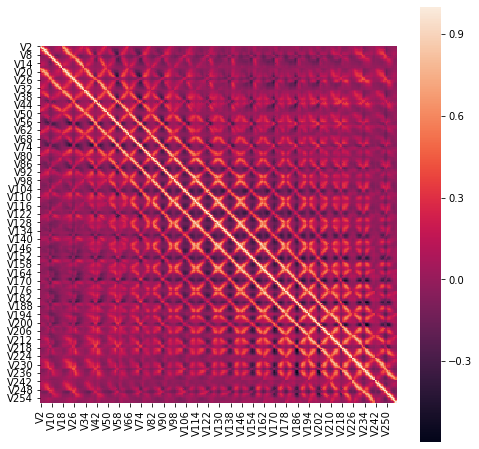

In [19]:
# Correlation Matrix for all variables
corrmat = zipData.corr()
f, ax = plt.subplots(figsize = (8, 8))
sn.heatmap(corrmat, vmax = 1, square = True);

In [21]:
#Encode the Categorical Variable
le = LabelEncoder()
zipData['Numero_enc'] = le.fit_transform(zipData['Numero'])
y = zipData['Numero_enc']
X = zipData.drop(columns = ["Numero",'Numero_enc'], axis = 1)

In [22]:
# Separate train and test data 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=0)

# Standarize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
svmClassSVC = SVC(gamma = 'scale')
svmClassSVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# Predict test data
y_pred = svmClassSVC.predict(X_test)
print(y_pred)
print(y_test)

[9 4 3 ... 3 8 7]
2615    9
296     4
7311    3
2343    3
5564    5
       ..
1357    9
3439    4
1284    3
3197    8
1515    7
Name: Numero_enc, Length: 1860, dtype: int32


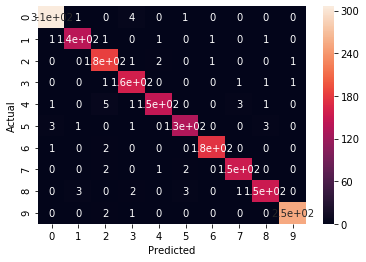

In [26]:
# Task 4: Generate a confusion table
# Pretty print confusion matrix
cm2 = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sn.heatmap(cm2, annot = True)

In [29]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[306   1   0   4   0   1   0   0   0   0]
 [  1 140   1   0   1   0   1   0   1   0]
 [  0   0 183   1   2   0   1   0   0   1]
 [  0   0   1 158   0   0   0   1   1   1]
 [  1   0   5   1 147   0   0   3   1   0]
 [  3   1   0   1   0 133   0   0   3   0]
 [  1   0   2   0   0   0 175   0   0   0]
 [  0   0   2   0   1   2   0 153   0   0]
 [  0   3   0   2   0   3   0   1 152   0]
 [  0   0   2   1   0   0   0   0   0 254]]


In [30]:
# Task 4: Calculate accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       312
           1       0.97      0.97      0.97       145
           2       0.93      0.97      0.95       188
           3       0.94      0.98      0.96       162
           4       0.97      0.93      0.95       158
           5       0.96      0.94      0.95       141
           6       0.99      0.98      0.99       178
           7       0.97      0.97      0.97       158
           8       0.96      0.94      0.95       161
           9       0.99      0.99      0.99       257

    accuracy                           0.97      1860
   macro avg       0.97      0.97      0.97      1860
weighted avg       0.97      0.97      0.97      1860



In [ ]:
# Accuracy: 0.97

In [ ]:
# Conclusion:
# The accuracy of SVM (0.97) is much better then of Naive Bayes Methode (0.71).